# Wordle – Client-Server version

> NOTE: Save this notebook under a new folder `Documents` > `html-lab-two`.

During our last web development lab, we [remade Wordle](https://github.com/ianfisk/teaching-materials/tree/main/wordle/part-one) using by writing a **local HTML file** (_local_ meaning the file is saved to our computer's hard drive). Our Wordle file contained all the HTML, CSS (`<style>` elements), and JS (`<script>` elements) we needed, all in one file. Pretty cool! 

Now we're going to update our website to resemble a real internet site: **_A web page hosted on a web server and accessed over the internet._**

# Internet Architecture Review

## Client-Server 

Remember from the lesson that a simplified drawing of Internet architecture looks like this:

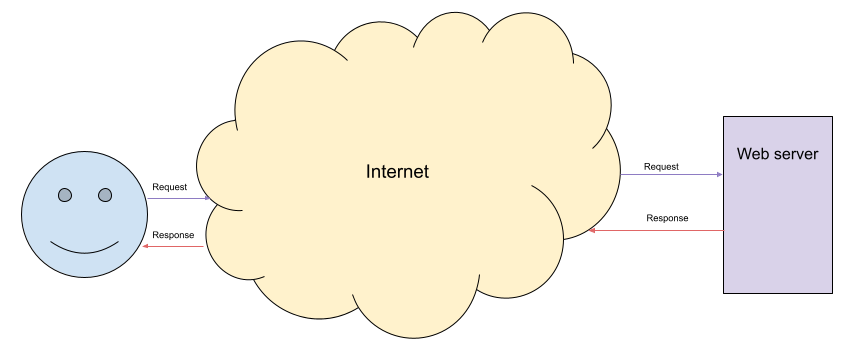

- The client (your computer) makes a request over the internet for a website
- The server that hosts the website looks at the request and sends a response containing the web page HTML back over the internet
- The client receives the response and renders the HTML

The same request-response model is then used to fetch all types of files need by the web page: separate JavaScript, CSS, and font files, images, videos, etc.

**Today we'll be updating our Wordle app to be served by a web server in this way over the internet. This will involve separating the HTML, CSS, and JavaScript into individual files, updating the HTML to request these separate files, and serving all these file from a web server.** Here is a slightly more detailed picture:

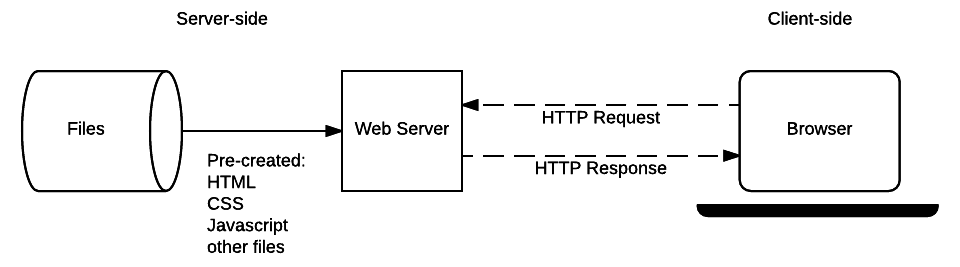

([src](https://developer.mozilla.org/en-US/docs/Learn/Server-side/First_steps/Client-Server_overview))

# 1) Separate JS, CSS, and HTML into individual files

> If you are stuck during these steps of opening and creating folders/files, refer back to [lab one's instructions](https://github.com/ianfisk/teaching-materials/tree/main/wordle/part-one#1-ive-created-some-html-to-get-you-started-but-we-need-to-save-it-to-your-computer). This is the same process, just different names for our new folder and file.

1. Find your `html-lab-one` folder where you saved your Wordle file on your local machine. I suggested saving the under `Documents` > `html-lab-one` > `lab-one.html`. Open the `html-lab-one` folder in VS Code.

1. Make a **new** folder in your `Documents` folder to hold the products of this lab. Call it `html-lab-two` (you may have already done this step and saved this notebook file in this folder).

    I suggest doing this step in the Windows file explorer, and **then open the new folder in VS Code** by right clicking in the file explorer left pane > `Add Folder to Workspace...` > navigate to and click on the `html-lab-two` _folder_ > Open). In the end you want both folders open in VS Code:

   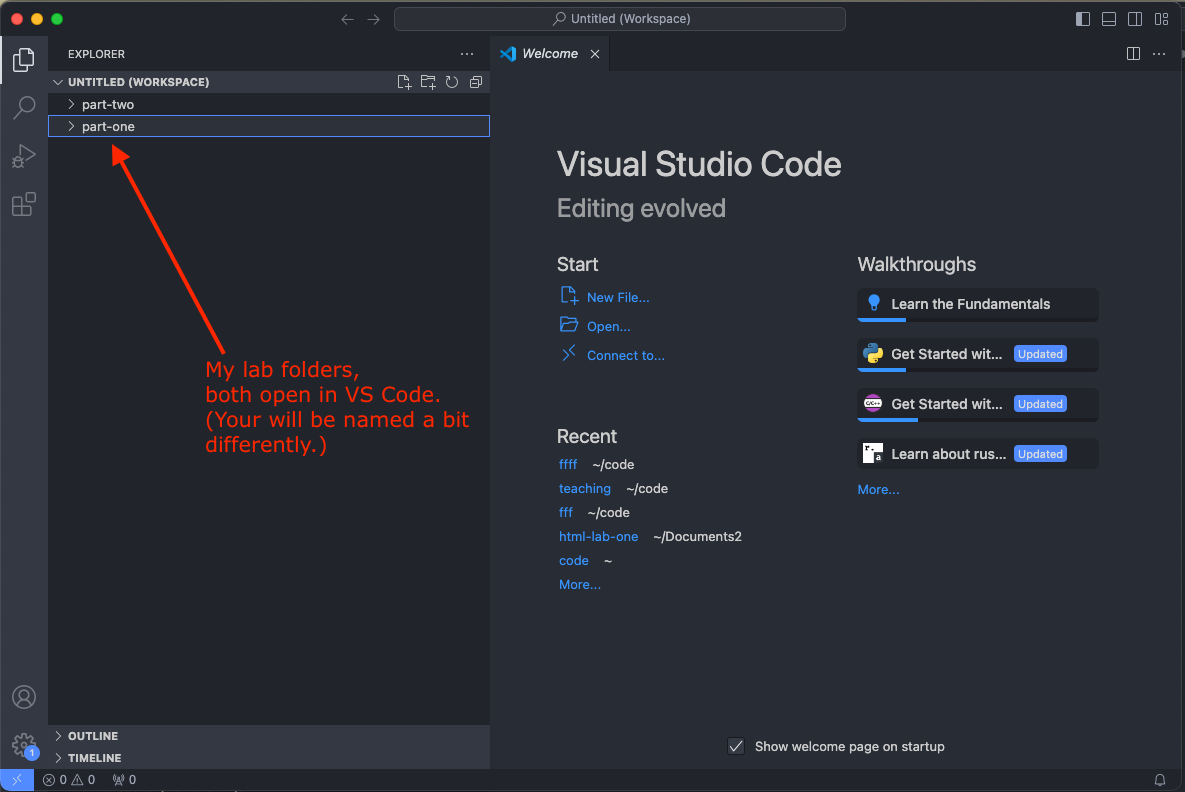

1. Create a blank HTML file named `index.html`. (So the full path will be `Documents` > `html-lab-two` > `index.html`.)

    **Why index.html?**

    The name `index.html` is a special name when it comes to web servers. If you go to `https://www.example.com/`, you're not actually specifying a specific file name to load (which would look something like `https://www.example.com/about.html`). Instead, the server will receive the request to just `https://www.example.com/` and by default serve any `index.html` file present from the directory the server is looking for files in.

1. Copy all your wordle code to `index.html`, and now we'll pull out the JavaScript and CSS into their own respective files. I'll walk you through this in this video:

    HERE ----> [Watch the video!!!!](https://youtu.be/DscdXPBAda4) <---- HERE

> NOTE: We won't be testing what we've done immediately after the video, so once you complete all the steps in there, we'll work on the web server and come back to testing our separate HTML, JS, and CSS files after the server is started.


# 2) Start a web server in Python to serve the files from step 1

1. Create a Python script that uses the `SimpleHTTPRequestHandler` to start a server in the directory our HTML, JS, and CSS files live

    Python has a useful class, [SimpleHTTPRequestHandler](https://docs.python.org/3/library/http.server.html#http.server.SimpleHTTPRequestHandler), that can be used to start a web server that serves files from a given directory. The documentation states:

   >This class serves files from the directory directory and below, or the current directory if directory is not provided, directly mapping the directory structure to HTTP requests.

    This is exactly what we want to server our new Wordle `index.html` file. Perfect!

    Let's get started on our server by `import`ing some Python classes from the `http.server` module. You'll notice that I'm defining a few variables here that control our server: 
    
    - `PORT` is the port the server will be accessible on. This will show up in the URL, which will be `http://localhost:8080/`. Here is a picture breaking down the parts of a URL ([src](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/Web_mechanics/What_is_a_URL)):
    
        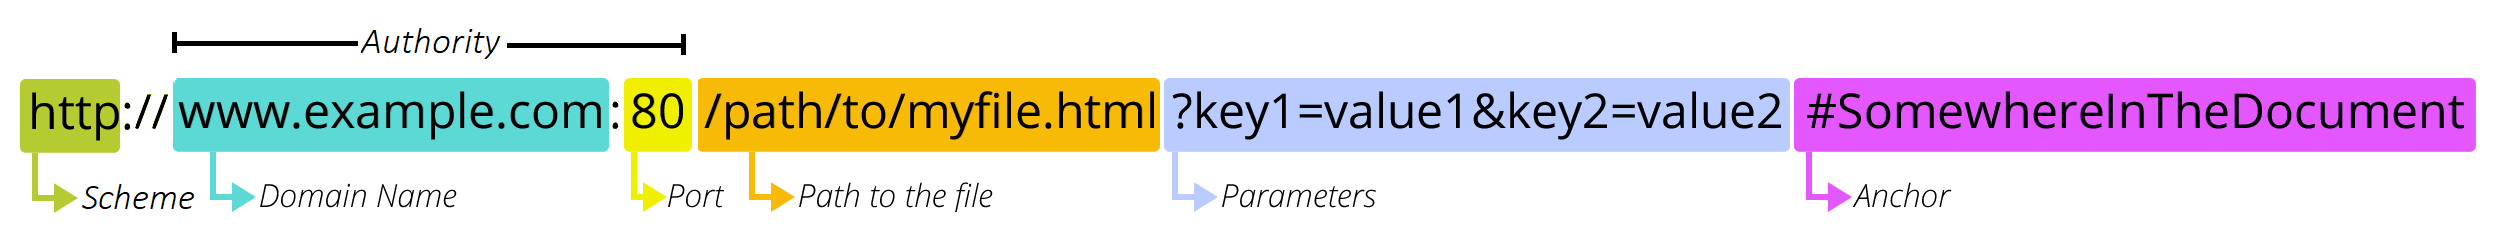
    
    - `SERVER_ADDRESS` is a [_tuple_](https://www.programiz.com/python-programming/tuple) in the form `(server_name, port)`. The server's name is unimportant, so it's an empty string.
    
    - `CODE_DIRECTORY` is the path to our `html-lab-two` folder that contains our new `index.html`, `js/main.js`, and `css/index.css` files.

In [ ]:
from http.server import SimpleHTTPRequestHandler, HTTPServer

PORT = 8080
SERVER_ADDRESS = ('', PORT)
CODE_DIRECTORY = 'C:\\Users\\<your_student_id_goes_here>\\Documents\\html-lab-two'



2. Update the `CODE_DIRECTORY` variable in the above cell to have your correct student ID in the path, and **run the cell**.

    (Remove the `<` and `>` when you enter your ID. Also update the path to the folder you saved the `index.html` file in from above, if it's in a different location.)

3. Next I'll provide a small `class` that configures our web server to serve files from the `CODE_DIRECTORY` folder. **Run the following cell**:

In [ ]:
class MyRequestHandler(SimpleHTTPRequestHandler):
	def __init__(self, *args, **kwargs):
		super().__init__(*args, directory=CODE_DIRECTORY, **kwargs)

In [ ]:
server = ...